# Machine Learning Practices(MLP) Project - May 2023
By - Hardik Sharma<br>
Roll No - 21F1006555<br>
Indian Institute of Technology (IIT), Madras<br>

<h3> Table of Contents </h3>

* [Problem Statement](#ps)
* [Objective](#obj)
* [Dataset Description](#data)
* [Data Analysis](#data_analysis)
    1. [Loading the data](#data_loading)
    2. [Correcting Datatypes](#cdt)
    3. [Data Statistics](#dstats)
    4. [Null Value Analysis](#nva)
    5. [Target Analysis](#target)
    6. [Univariate Analysis](#uva)
        1. [Numerical Features](#unf)
        2. [Categorical Features](#ucf)
    7. [Bivariate Analysis](#bva)
        1. [Numerical vs Sentiment](#bvnmp)
    8. [Multivariate Analysis](#mva)
        1. [Numerical Pairplots](#mvnpp)
        2. [Categorical vs Numerical wrt Made_Purchase](#mvcnwmp)
* [Data Preprocessing and Model Training](#dpmt)
    2. [Preprocessing Pipeline](#ppp)
    3. [Splitting Training and Test Datasets](#sttd)
    4. [Model Selection](#mods)
        1. [Baseline Model](#modsbm)
        2. [Binary Classifiers](#modsbc)
        3. [Ensembling Classifiers](#modsec)
    5. [Final Model Training and Tuning](#mtt)
    6. [Evaluating the Model](#etm)
* [Conclusion](#section-three)

<a id="ps"></a>
<h2> Problem Statement </h2>
In this dataset each record represents a movie-review pair with movie title, description, genres, duration, director, actors, users' ratings, review text, reviewer name, etc. Your task is to build an ML model to predict sentiment of the review text.

<a id="obj"></a>
<h2> Objective </h2>
To predict Sentiment using Binary Classification methods with minimum F1 micro score of 0.66

<a id="data"></a>
<h2> Dataset Description </h2>
Movie Dataset => The columns of the movie dataset represent 

<ol>
<li><b>movieid</b>: Unique identifier for each movie.</li>
<li><b>title</b>: Movie's title or name.</li>
<li><b>audienceScore</b>: Score given by the audience.</li>
<li><b>rating</b>: Movie's rating (e.g., PG-13, R).</li>
<li><b>ratingContents</b>: Contents influencing the movie's rating.</li>
<li><b>releaseDateTheaters</b>: Date of theatrical release.</li>
<li><b>releaseDateStreaming</b>: Date of streaming release.</li>
<li><b>runtimeMinutes</b>: Duration of the movie in minutes.</li>
<li><b>genre</b>: Category or type of movie.</li>
<li><b>originalLanguage</b>: Language in which the movie is originally produced.</li>
<li><b>director</b>: Director of the movie.</li>
<li><b>boxOffice</b>: Earnings from movie's theater release.</li>
<li><b>distributor</b>: Company distributing the movie.</li>
<li><b>soundType</b>: Type of sound technology used.</li>
</ol>

Train Data Columns
<ol>
<li><b>movieid</b>: Unique identifier for each movie.</li>
<li><b>reviewerName</b>: Name of the person who wrote the review.</li>
<li><b>isFrequentReviewer</b>: Indicator if the reviewer is frequent or not.</li>
<li><b>reviewText</b>: Text content of the review.</li>
<li><b>sentiment</b>: Sentiment of the review (positive, negative, neutral).</li>
<li><b>count</b>: Count or frequency of reviews by the same reviewer.</li>
</ol>

<a id="data_analysis"></a>
<h2> Data Analysis </h2>
<a id="data_loading"></a>
<h3>1. Loading the data</h3>
Loading libraries, modules, functions and the dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
file_path = '/kaggle/input/sentiment-prediction-on-movie-reviews'

train_df = pd.read_csv(file_path+'/train.csv')
test_df = pd.read_csv(file_path+'/test.csv')
movies_df = pd.read_csv(file_path+'/movies.csv')

In [ ]:
movies_df.columns

In [ ]:
# importing basic libraries required for the project

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

from sklearn import set_config
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ipipe
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
train_df.columns

In [ ]:
train_df.head()

In [ ]:
movies_df.head()

<h3>Obervations</h3>

Since both these columns needs to be used for data handing we need to merge movies_df with train_df and test_df.

In [ ]:
train_df['count'] = range(1, len(train_df) + 1)

merged_df = pd.merge(train_df, movies_df, on='movieid', how='left')

merged_df.drop_duplicates(subset = 'count' , inplace = True)

merged_df.drop(columns='count', inplace=True)

In [ ]:
test_df['count'] = range(1, len(test_df) + 1)

test_merged_df = pd.merge(test_df, movies_df, on='movieid', how='left')

test_merged_df.drop_duplicates(subset = 'count' , inplace = True)

test_merged_df.drop(columns='count', inplace=True)

In [ ]:
merged_df.head()

In [ ]:
# Dropping duplicates from train data yields better model training
merged_df = merged_df.drop_duplicates()

<h3>We have merged movies and train column based on the movieid column</h3>

In [ ]:
SAMPLES_COUNT, FEATURES_COUNT = merged_df.shape
print("Number of Samples: {}".format(SAMPLES_COUNT))
print("Number of Features: {}".format(FEATURES_COUNT))

In [ ]:
# Checking Datatypes of each column
merged_df.dtypes

<a id="cdt"></a>
<h3>2. Correcting Datatypes</h3>
boxOffice features has been changed from numerical to object for ease of processing in later steps.
sentiment was converted into bool from object

In [ ]:
# Remove non-numeric characters from 'boxOffice' column using regular expression
merged_df['boxOffice'] = merged_df['boxOffice'].str.replace(r'[^\d.]', '', regex=True)

# Convert 'boxOffice' column to numeric
merged_df['boxOffice'] = pd.to_numeric(merged_df['boxOffice'])

# Remove non-numeric characters from 'boxOffice' column using regular expression
test_merged_df['boxOffice'] = test_merged_df['boxOffice'].str.replace(r'[^\d.]', '', regex=True)

# Convert 'boxOffice' column to numeric
test_merged_df['boxOffice'] = pd.to_numeric(test_merged_df['boxOffice'])

In [ ]:
merged_df['sentiment'] = merged_df['sentiment'].map({'POSITIVE': True, 'NEGATIVE': False})

In [ ]:
merged_df['sentiment'].dtype

<a id="dstats"></a>
<h3>3. Data Statistics and Relationships</h3>

In [ ]:
merged_df.describe()

<h5>Observations</h5>
<li>RuntimeMinutes and boxOffice columns have outliers present in them since max and 75th percentile are having a huge gap. We have to handle them

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(merged_df.corr(), annot=True)

<h5>Observations</h5>
<li>There are no highly correlated features.

In [ ]:
merged_df.isnull().sum()

<h5>Observations</h5>
<li>Many null values are present which must be fixed as most of the classification models cannot process null values. We have to impute them

Unique Values from each category

In [ ]:
print(merged_df.apply(lambda col: col.nunique()))

Observation: Ratings can be one hot with feature reduction
OriginalLanguage can also be one hot encoded with features are reduced.
audienceScore is already normalized.
Other values are higly

In [ ]:
merged_df.isnull().sum()

Since SoundType has so may null values we can consider deleting that column

<a id="target"></a>
<h3>5. Target Analysis</h3>

In [ ]:
plt.figure(figsize=(12,5))
plt.pie(merged_df.sentiment.value_counts(),
        labels=["NEGATIVE", "POSITIVE"],
        autopct='%.2f%%',
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.title("Sentiment")
plt.legend()
plt.show()

<h5>Inferences</h5>

<ul>
    <li>66.82% of the users who visited the website did not make any purchase.</li>
    <li>33.18% of the users who visited the website made purchases.</li>
    <li>Dataset is imbalanced in the ratio 2:1 favoring <i>POSITIVE</i> values</li>
    <li><b>Conclusion:</b> We may need to use techniques to handle imbalanced datasets.
</ul>
This data indicates that the visitors mostly has positive sentiment towards the movie Let us examine the various other data pointers in the dataset to try and infer what sentiment the visitor makes

<a id="uva"></a>
<h3>6. Univariate Analysis</h3>
<a id="unf"></a>
<h4>6.1. Numerical Features</h4>

In [ ]:
cols = merged_df.select_dtypes(include=np.number).columns.values
fig, ax = plt.subplots(len(cols), 2, figsize = (8, 8))
for i in range(len(cols)):
    sns.set_style("darkgrid")
    sns.boxplot(x= merged_df[cols[i]], ax = ax[i,0])
    sns.histplot(merged_df[cols[i]], ax = ax[i,1])
plt.tight_layout()

<h5>Inferences</h5>

<li>Data has very high skew which must be fixed using appropriate transformation technique.
<li>Data is Normally Distributed.
<li> Outliers are present in the data we have to remove them.

<a id="ucf"></a>
<h4>6.2. Categorical Features</h4>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the columns with datatype 'object' (categorical columns)
cols = merged_df.select_dtypes(include="object").columns.values

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(len(cols) / 2))
num_cols = min(2, len(cols))

# Create subplots with larger size and spacing
fig, ax = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
plt.subplots_adjust(hspace=0.5)

j = 0
for i in range(len(cols)):
    sns.set_style("dark")

    # Checking if the number of unique values in the column is greater than 10
    if merged_df[cols[i]].nunique() > 10:
        # Getting the top 10 categories based on their count
        top_10_categories = merged_df[cols[i]].value_counts().nlargest(10).index
        # Filtering the DataFrame to include only the top 10 categories
        filtered_df = merged_df[merged_df[cols[i]].isin(top_10_categories)]
        pl = sns.countplot(x=filtered_df[cols[i]], ax=ax[i // 2, j])
    else:
        # If the number of unique values is less than or equal to 10, plot all categories
        pl = sns.countplot(x=merged_df[cols[i]], ax=ax[i // 2, j])

    pl.bar_label(pl.containers[0])
    j = (j + 1) % num_cols

plt.tight_layout()
plt.show()


from these observations we can take only 1 objservation from original and name other's as other to handle imbalance adn top 3 from rating.
and apply Tfidf for others.

<a id="bva"></a>
<h3>7. Bivariate Analysis</h3>
<a id="bvnmp"></a>
<h4>7.1. Numerical vs Made_Purchase</h4>

In [ ]:
cols = merged_df.select_dtypes(include=np.number).columns.values
num_chart_cols = 3
fig, ax = plt.subplots(int(np.ceil(len(cols) / num_chart_cols)), num_chart_cols, figsize=(20, 5))

j = 0
for i in range(len(cols)):
    sns.set_style("darkgrid")
    sns.barplot(y=merged_df[cols[i]], x=merged_df['sentiment'], ax=ax[i])
    j = (j + 1) % num_chart_cols

plt.tight_layout()
plt.show()

<h5>Inferences</h5>

<li>High audienceScore are more likely to Positive sentiment.
<li>High boxOffice collection are more likely to Positive sentiment.

In [ ]:
merged_df.dtypes

<a id="mva"></a>
<h3>8. Multivariate Analysis</h3>
<a id="mvnpp"></a>
<h4>8.1. Numerical Pairplots</h4>

In [ ]:
# ppData = merged_df.select_dtypes(include=[np.number, 'bool'])
# ppData = SimpleImputer().fit_transform(ppData)
# ppData = pd.DataFrame(QuantileTransformer().fit_transform(ppData), columns=merged_df.select_dtypes(include=[np.number, 'bool']).columns.values)

# g = sns.PairGrid(ppData, hue="sentiment")
# g.map_lower(sns.scatterplot)
# g.map_upper(sns.kdeplot, fill=True)
# g.map_diag(sns.kdeplot)

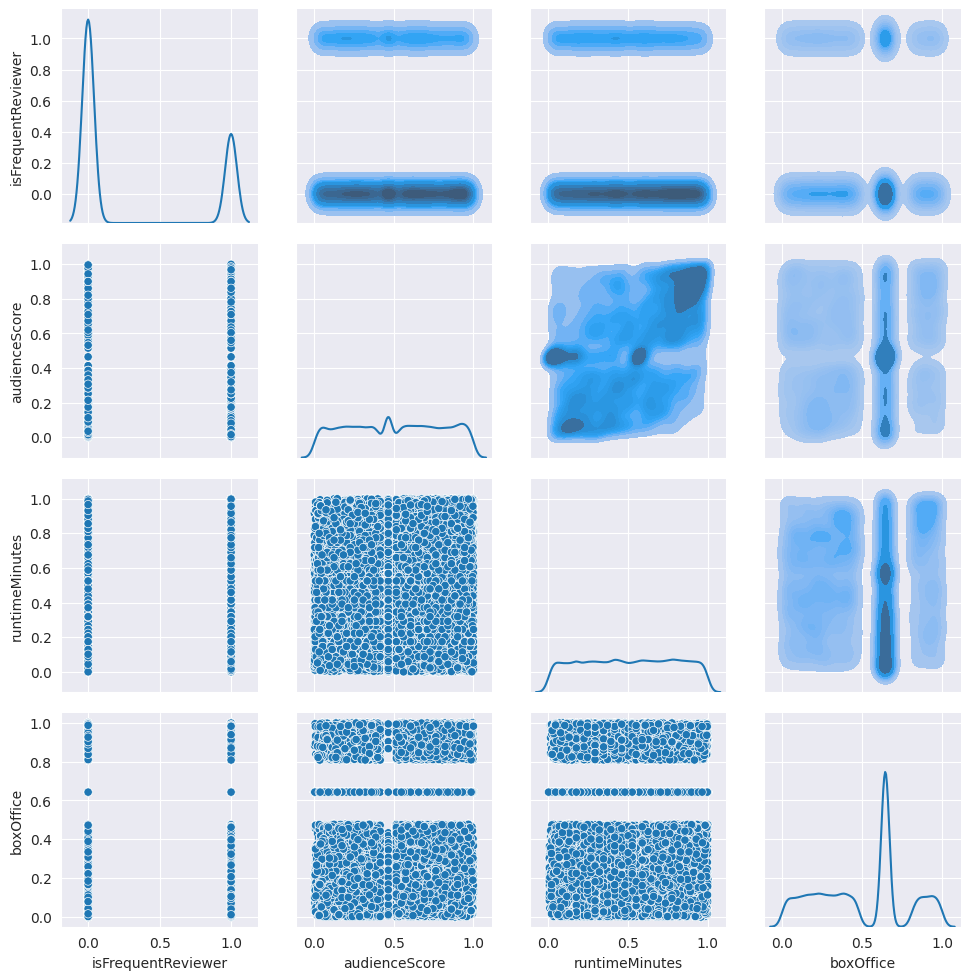

<h5>Observations</h5>
<li>Most of the data in the POSITIVE and NEGATIVE classes overlap. This may lead to high error rate in non-ensembling classifiers.
<li>Ensembline/Stacking Classifiers will be required for better predictions of the dataset.

In [ ]:
merged_df.columns

<a id="dpmt"></a>
<h2>Data Preprocessing and Model Training</h2>
<a id="dpmtcpm"></a>
<h3>1. Custom Preprocessing Methods</h3>
Aggregating the lower-frequent categories of <i>Language</i>

In [ ]:
# Perform the functionality of removing square brackets from the 'ratingContents' column
merged_df['ratingContents'] = merged_df['ratingContents'].str.replace(r'\[|\]', '', regex=True)
test_merged_df['ratingContents'] = test_merged_df['ratingContents'].str.replace(r'\[|\]', '', regex=True)

In [ ]:
num_features = ['boxOffice', 'audienceScore', 'runtimeMinutes']
vec_features = [ 'reviewerName', 'title', 'director', 'ratingContents', 'distributor', 'genre', 'soundType','reviewText']
bool_features = ['isFrequentReviewer']
ohe_features = ['originalLanguage','rating']

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

# Create KNNImputer with n_neighbors=5
imputer = KNNImputer(n_neighbors=5)

# Impute missing values inplace in merged_df
merged_df[num_features] = imputer.fit_transform(merged_df[num_features])

# Impute missing values inplace in test_merged_df
test_merged_df[num_features] = imputer.transform(test_merged_df[num_features])





# Display box plots
plt.boxplot(merged_df[num_features], labels=num_features)
plt.title('Box Plots after Imputation and Transformation')
plt.ylabel('Transformed Values')
plt.xlabel('Features')
plt.show()

Observations: For audience Score and runtimeMinutes we can go with StandardScaler but for boxOffice we have to use Quantile transformer since outliers are high

In [ ]:
# vec_features = ['reviewerName', 'title', 'director', 'ratingContents', 'distributor', 'genre', 'soundType']

# # Impute missing values using most frequent value
# imputer = SimpleImputer(strategy='most_frequent')
# merged_df[vec_features] = imputer.fit_transform(merged_df[vec_features])
# test_merged_df[vec_features] = imputer.fit_transform(test_merged_df[vec_features])

In [ ]:
from sklearn.impute import SimpleImputer

vec_features = ['reviewerName', 'title', 'director', 'ratingContents', 'distributor', 'genre', 'soundType']

# Fill missing values with empty string
merged_df[vec_features] = merged_df[vec_features].fillna('')
test_merged_df[vec_features] = test_merged_df[vec_features].fillna('')


In [ ]:
merged_df['reviewText'] = merged_df['reviewText'].fillna('')
test_merged_df['reviewText'] = test_merged_df['reviewText'].fillna('')

In [ ]:
ohe_features = ['originalLanguage','rating']

# Impute missing values using most frequent value
imputer = SimpleImputer(strategy='most_frequent')
merged_df[vec_features] = imputer.fit_transform(merged_df[vec_features])
test_merged_df[vec_features] = imputer.fit_transform(test_merged_df[vec_features])

In [ ]:
top_categories = merged_df['originalLanguage'].value_counts().nlargest(1).index.tolist()
merged_df['originalLanguage'] = merged_df['originalLanguage'].apply(lambda x: x if x in top_categories else 'other')
test_merged_df['originalLanguage'] = test_merged_df['originalLanguage'].apply(lambda x: x if x in top_categories else 'other')

In [ ]:
top_categories = merged_df['rating'].value_counts().nlargest(3).index.tolist()
merged_df['rating'] = merged_df['rating'].apply(lambda x: x if x in top_categories else 'other')
test_merged_df['rating'] = test_merged_df['rating'].apply(lambda x: x if x in top_categories else 'other')

In [ ]:
test_merged_df.isnull().sum()

In [ ]:
merged_df['releaseDateTheaters']=merged_df['releaseDateTheaters'].fillna('')
test_merged_df['releaseDateTheaters']=test_merged_df['releaseDateTheaters'].fillna('')

merged_df['releaseDateStreaming']=merged_df['releaseDateStreaming'].fillna('')
test_merged_df['releaseDateStreaming']=test_merged_df['releaseDateStreaming'].fillna('')

In [ ]:
# Rename the 'isTopCritic' column to 'isFrequentReviewer'
test_merged_df.rename(columns={'isTopCritic': 'isFrequentReviewer'}, inplace=True)

target = merged_df.sentiment
features = merged_df[['movieid','reviewerName','isFrequentReviewer','title','reviewText','audienceScore','director','originalLanguage', 'genre','boxOffice','distributor','runtimeMinutes','rating','ratingContents','soundType','releaseDateStreaming','releaseDateTheaters']].copy()

In [ ]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

NAME_MIN_DF = 6
MAX_FEAT_DESCP = 30000

preprocess = ColumnTransformer(
    [
        ('originalLanguage_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['originalLanguage']),
        ('isFrequentReviewer_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['isFrequentReviewer']),        
        ('rating_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['rating']),
        ('reviewerName_tfidf', TfidfVectorizer(lowercase=True), 'reviewerName'),
        ('title_tfidf', TfidfVectorizer(lowercase=True), 'title'),
        ('soundType_tfidf', TfidfVectorizer(lowercase=True), 'soundType'),
        ('genre_tfidf', TfidfVectorizer(lowercase=True), 'genre'),
#         ('releaseDateTheaters_tfidf', TfidfVectorizer(lowercase=True), 'releaseDateTheaters'),
#         ('releaseDateStreaming_tfidf', TfidfVectorizer(lowercase=True), 'releaseDateStreaming'),
        ('movieid_tfidf', TfidfVectorizer(lowercase=True), 'movieid'),
        ('director_tfidf', TfidfVectorizer(lowercase=True), 'director'),
        ('ratingContents_tfidf', TfidfVectorizer(), 'ratingContents'),
        ('distributor_tfidf', TfidfVectorizer(lowercase=True), 'distributor'),
        ('reviewText_tfidf', TfidfVectorizer(), 'reviewText'),
        ('audienceScore_scaled', StandardScaler(), ['audienceScore']),
        ('runtimeMinutes_qt', QuantileTransformer(output_distribution='normal'), ['runtimeMinutes']),
        ('boxOffice_qt', QuantileTransformer(output_distribution='normal'), ['boxOffice'])
    ],
    remainder='drop'
)

In [ ]:
merged_df.isnull().sum()

In [ ]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create the logistic regression model
logistic_model = make_pipeline(
    preprocess,
    LogisticRegression()
)

# Fit the logistic regression model to the training data
logistic_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have already defined and fitted the 'logistic_model'

# Make predictions on the training and test data
y_train_pred_logistic = logistic_model.predict(X_train)
y_test_pred_logistic = logistic_model.predict(X_test)

# Calculate the accuracy for logistic regression predictions
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)

# Print the results
print('Train Accuracy (Logistic Regression): %.4f' % train_accuracy_logistic)
print('Test Accuracy (Logistic Regression): %.4f' % test_accuracy_logistic)


from sklearn.metrics import accuracy_score,classification_report

# Print classification report for precision, recall, and F1-score
print(classification_report(y_test, y_test_pred_logistic))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

In [ ]:
# Create the XGBoost model
xgb_model = make_pipeline(
    preprocess,
    XGBClassifier()
)

# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and test data for XGBoost
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy for XGBoost predictions
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

# Print the results for XGBoost
print('Train Accuracy (XGBoost): %.4f' % train_accuracy_xgb)
print('Test Accuracy (XGBoost): %.4f' % test_accuracy_xgb)
print(classification_report(y_test, y_test_pred_xgb))

In [ ]:
# Create the Gradient Boosting model
gradient_boost_model = make_pipeline(
    preprocess,
    GradientBoostingClassifier()
)

# Fit the Gradient Boosting model to the training data
gradient_boost_model.fit(X_train, y_train)

# Make predictions on the training and test data for Gradient Boosting
y_train_pred_gb = gradient_boost_model.predict(X_train)
y_test_pred_gb = gradient_boost_model.predict(X_test)

# Calculate the accuracy for Gradient Boosting predictions
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)

# Print the results for Gradient Boosting
print('Train Accuracy (Gradient Boosting): %.4f' % train_accuracy_gb)
print('Test Accuracy (Gradient Boosting): %.4f' % test_accuracy_gb)
print(classification_report(y_test, y_test_pred_gb))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create the Gradient Boosting model
DecisionTree_model = make_pipeline(
    preprocess,
    DecisionTreeClassifier()
)

# Fit the Gradient Boosting model to the training data
DecisionTree_model.fit(X_train, y_train)

# Make predictions on the training and test data for Gradient Boosting
y_train_pred_dt = DecisionTree_model.predict(X_train)
y_test_pred_dt = DecisionTree_model.predict(X_test)

# Calculate the accuracy for Gradient Boosting predictions
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# Print the results for Gradient Boosting
print('Train Accuracy (Gradient Boosting): %.4f' % train_accuracy_dt)
print('Test Accuracy (Gradient Boosting): %.4f' % test_accuracy_dt)
print(classification_report(y_test, y_test_pred_dt))

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Create the Decision Tree model
decision_tree_model = make_pipeline(
    preprocess,
    DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
)

# Create the Logistic Regression model
logistic_model = make_pipeline(
    preprocess,
    LogisticRegression(
        penalty='l2', dual=False, tol=0.0001, C=1,
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,
        solver='liblinear', max_iter=1000, multi_class='auto', verbose=0, warm_start=False,
        n_jobs=None, l1_ratio=None
    )
)


# Create the XGBoost model
xgb_model = make_pipeline(
    preprocess,
    XGBClassifier(
        max_depth=6,
        n_estimators=100,
        learning_rate=0.3,
        subsample=1,
        colsample_bytree=1
    )
)

# Create the StackingClassifier with Decision Tree, Logistic Regression, Gradient Boosting, and XGBoost as base estimators
stacking_model = StackingClassifier(
    estimators=[
        ('decision_tree', decision_tree_model),
        ('logistic', logistic_model),
        ('gradient_boost', gradient_boost_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='liblinear',
        random_state=42
    )
)

# Fit the stacking classifier to the training data
stacking_model.fit(X_train, y_train)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline

# # Create the logistic regression model
# logistic_model = make_pipeline(
#     preprocess,
#     LogisticRegression(
#         penalty='l2', dual=False, tol=0.0001, C=1,
#         fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,
#         solver='liblinear', max_iter=1000, multi_class='auto', verbose=0, warm_start=False,
#         n_jobs=None, l1_ratio=None
#     )
# )

# # Fit the logistic regression model to the training data
# logistic_model.fit(X_train, y_train)

In [ ]:
y_test_pred_stacking = stacking_model.predict(test_merged_df)

In [ ]:
y_test_pred_stacking

In [ ]:
# Map the predicted classes to 'POSITIVE' and 'NEGATIVE'
sentiment_mapping = {True: 'POSITIVE', False: 'NEGATIVE'}
y_test_pred_sentiment = pd.Series(y_test_pred_stacking).map(sentiment_mapping)

# Assuming you have 'X_test' as a DataFrame
# Create the 'result_df' DataFrame with 'id' and 'sentiment' columns
result_df = pd.DataFrame({'id': range(len(test_df)), 'sentiment': y_test_pred_sentiment})

# Set the 'id' column as the index
result_df.set_index('id', inplace=True)

In [ ]:
# Assuming 'result_column' is the column in result_df containing True and False values
true_count = result_df['sentiment'].value_counts().get('POSITIVE', 0)
false_count = result_df['sentiment'].value_counts().get('NEGATIVE', 0)

# Print the counts
print("Number of True values:", true_count)
print("Number of False values:", false_count)

In [ ]:
result_df.to_csv('submission.csv')